In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [31]:
train = pd.read_csv('../data/pdx/pdx_act_mut_cpr.csv')
train.head()

,line,act_AAK1,act_ABL1,act_ABL1_nonphosphorylated,act_ABL1_phosphorylated,act_ABL2,act_ACVR1,act_ACVR1B,act_ACVR2A,act_ACVR2B,...,mut_CDKN1A,mut_ROS1,mut_DAXX,mut_TSC2,mut_RAD51C,mut_ARID1A,mut_AURKB,mut_U2AF1,mut_REL,mut_BRCA1
0,X1027,1.00,1,0.68,1.0,1.00,1.0,0.82,0.75,0.72,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,X1027,1.00,1,1.00,1.0,1.00,1.0,1.00,0.93,1.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,X1027,0.75,1,0.53,0.1,0.96,1.0,0.93,1.00,0.93,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,X1027,0.75,1,0.53,0.1,0.96,1.0,0.93,1.00,0.93,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,X1027,0.75,1,0.53,0.1,0.96,1.0,0.93,1.00,0.93,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
train['CRorPR'].value_counts()

CRorPR
0    306
1     23
Name: count, dtype: int64

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
hps = pd.read_csv('../results/hp_search/results_rf_ib_OS_comb_060623.csv', index_col=0)
hps.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.502896,0.004836,0.038752,0.000482,True,NaN,auto,8,3,500,"OrderedDict([('bootstrap', True), ('max_depth'...",0.665323,0.744262,0.544262,0.586885,0.954918,0.699130,0.145045,1
16,0.501958,0.005289,0.038693,0.000217,True,NaN,auto,8,3,500,"OrderedDict([('bootstrap', True), ('max_depth'...",0.653226,0.754098,0.534426,0.596721,0.946721,0.697039,0.144238,2
127,1.237252,0.008385,0.087404,0.000735,True,80.0,auto,8,4,1250,"OrderedDict([('bootstrap', True), ('max_depth'...",0.653226,0.754098,0.531148,0.590164,0.950820,0.695891,0.147320,3
119,0.751917,0.010518,0.055183,0.000914,True,40.0,auto,8,4,750,"OrderedDict([('bootstrap', True), ('max_depth'...",0.657258,0.754098,0.527869,0.586885,0.946721,0.694566,0.146902,4
65,1.443137,0.019317,0.103625,0.001056,True,80.0,sqrt,8,4,1500,"OrderedDict([('bootstrap', True), ('max_depth'...",0.649194,0.757377,0.531148,0.586885,0.946721,0.694265,0.146892,5


In [34]:
max_depth = hps['param_max_depth'].values[0]
max_depth = None
max_features = hps['param_max_features'].values[0]
min_samples_leaf = hps['param_min_samples_leaf'].values[0]
min_samples_split = hps['param_min_samples_split'].values[0]
n_estimators = hps['param_n_estimators'].values[0]
rf = RandomForestClassifier(max_depth=max_depth, max_features=max_features, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, n_estimators=n_estimators, random_state=0)

In [35]:
X_train = train[[col for col in train.columns if col.startswith('mut_') or col.startswith('act_')]]
y_train = train['CRorPR']

In [36]:
rf.fit(X_train, y_train)

/home/kchen/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_leaf=8,
                       min_samples_split=3, n_estimators=500, random_state=0)

In [37]:
outcome = 'OS'

test = pd.read_csv('../data/crc_ib_mut_act.csv', index_col=0)
test = test.dropna(subset=[outcome])
test.head()


,act_AAK1,act_ABL1,act_ABL1_nonphosphorylated,act_ABL1_phosphorylated,act_ABL2,act_ACVR1,act_ACVR1B,act_ACVR2A,act_ACVR2B,act_ACVRL1,...,mut_DAXX,mut_TSC2,mut_RAD51C,mut_ARID1A,mut_AURKB,mut_U2AF1,mut_REL,mut_BRCA1,OS,PFS
GENIE-DFCI-000971,1.0,0.581644,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,1.0
GENIE-DFCI-001038,1.0,0.581644,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,1.0
GENIE-DFCI-002499,1.0,0.344558,1.0,1.0,0.505122,1.0,1.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,0,1,0.0
GENIE-DFCI-002507,1.0,0.581644,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,1.0
GENIE-DFCI-002561,1.0,0.581644,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,1.0


In [38]:
X_test = test[[col for col in test.columns if 'mut_' in col or 'act_' in col in col]]
y_test = test[outcome]
#invert y_test
y_test.value_counts()

OS
1    105
0     34
Name: count, dtype: int64

In [39]:
from sklearn.metrics import roc_auc_score
auroc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
auroc

0.6257703081232493

<Axes: >

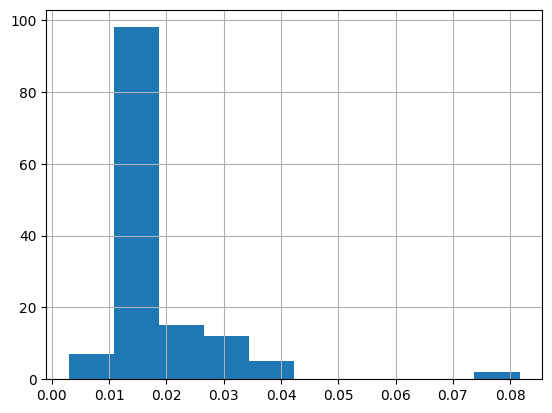

In [40]:
test['pred'] = rf.predict(X_test)
test['pred_prob'] = rf.predict_proba(X_test)[:,1]
test['pred_prob'].hist()

In [41]:
test['pred_prob'].describe()

count    139.000000
mean       0.018542
std        0.010021
min        0.002942
25%        0.014128
50%        0.015231
75%        0.018523
max        0.081640
Name: pred_prob, dtype: float64

In [42]:
test['pred_prob_quart'] = pd.qcut(test['pred_prob'], 4, labels=False)
test['pred_prob_quart'].value_counts()

pred_prob_quart
1    35
3    35
0    35
2    34
Name: count, dtype: int64

In [28]:
test.to_csv('../results/preds/peds_crc_ib_mut_act_rf_OS_comb_060623.csv')